In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../data/raw/water_potability.csv')
print(f"Dimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")
display("Primeras 5 filas:", df.head())

Dimensiones del dataset: 3276 filas y 10 columnas


'Primeras 5 filas:'

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


| Variable | Qué mide (Físico/Químico) | Importancia en Planta de Tratamiento |
|----------|---------------------------|--------------------------------------|
| pH | Acidez o Alcalinidad (0-14). | El rango seguro OMS es 6.5 a 8.5. Si es muy bajo, corroe tuberías (metales pesados); si es muy alto, sabe mal y reduce la desinfección. |
| Hardness (Dureza) | Sales de calcio y magnesio. | Agua "dura" daña maquinaria y calderas. No es tóxica per se, pero afecta el sabor y la solubilidad. |
| Solids (Solidos disueltos totales) | Total de Sólidos Disueltos. | Minerales y sales. Alto TDS puede indicar contaminación industrial o aguas residuales. |
| Chloramines (Cloraminas) | Desinfectante (Cloro + Amoniaco). | Se usa para matar bacterias. Ojo: Si hay poco, crecen bacterias; si hay mucho, es tóxico. |
| Sulfate (sulfato) | Sulfatos disueltos. | Común en minería o industria. En altas dosis tiene efecto laxante y da sabor amargo. |
| Conductivity (Conductividad) | Capacidad de conducir electricidad. | Indica la cantidad de iones disueltos. Se usa como indicador rápido de cambios en la calidad. |
| Organic_carbon (Carbono orgánico) | Materia orgánica. | Viene de plantas en descomposición o contaminación. Crítico: Al reaccionar con el cloro, puede crear cancerígenos. |
| Trihalomethanes | Trihalometanos (THMs). | Muy peligroso. Son subproductos químicos formados cuando el cloro reacciona con materia orgánica. Son cancerígenos. |
| Turbidity | Turbidez (Nubosidad). | Partículas suspendidas (barro, algas). El agua turbia protege a las bacterias de la desinfección UV o cloro. |
| Potability | Objetivo (Target). | 1 = Potable, 0 = No potable. |

Distribución de la variable objetivo 'Potability':
Potability
0    1998
1    1278
Name: count, dtype: int64

Porcentajes de la variable objetivo 'Potability':
Potability
0    60.99
1    39.01
Name: proportion, dtype: float64


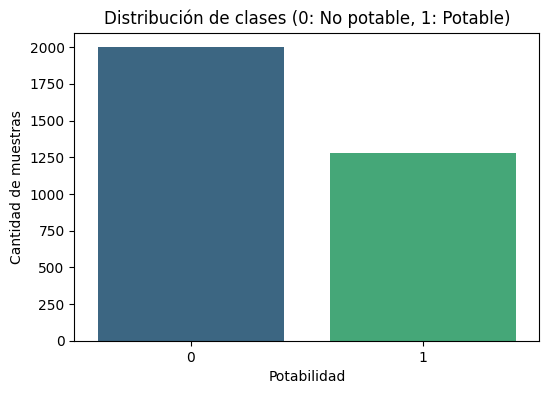

In [6]:
print("Distribución de la variable objetivo 'Potability':")
print(df['Potability'].value_counts())

print("\nPorcentajes de la variable objetivo 'Potability':")
print((df['Potability'].value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df, palette='viridis')
plt.title('Distribución de clases (0: No potable, 1: Potable)')
plt.xlabel('Potabilidad')
plt.ylabel('Cantidad de muestras')
plt.show()

Desbalance de clase en la variable target.
- 61% de los datos es no potable y el 39% es potable.

In [7]:
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [8]:
print("Análisis de valores faltantes por columna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print("\nPorcentaje de Valores faltantes por columna:")
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage[missing_percentage > 0].round(2))

Análisis de valores faltantes por columna:
ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64

Porcentaje de Valores faltantes por columna:
ph                 14.99
Sulfate            23.84
Trihalomethanes     4.95
dtype: float64


In [9]:
print("Estadísticas descriptivas del dataset:")
display(df.describe().T)


Estadísticas descriptivas del dataset:


,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [10]:
print("Estadísticas descriptivas de las variables con valores faltantes:")
display(df[['ph', 'Sulfate', 'Trihalomethanes']].describe().T)

Estadísticas descriptivas de las variables con valores faltantes:


,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000,6.093092,7.036752,8.062066,14.000000
Sulfate,2495.0,333.775777,41.416840,129.000,307.699498,333.073546,359.950170,481.030642
Trihalomethanes,3114.0,66.396293,16.175008,0.738,55.844536,66.622485,77.337473,124.000000


- Debido a que la media y la mediana están tan cerca, significa que no hay outliers extremos que estén jalando el promedio hacia un lado. Por lo tanto usar la **Media** para imputar los datos faltantes es correcto.

In [17]:
# Funcion para detectar outliers usando el método del IQR
def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers

# Detectar outliers en todas las columnas numéricas
outliers_dict = {}
for columna in df.select_dtypes(include='float64').columns:
    outliers = detectar_outliers_iqr(df, columna)
    outliers_dict[columna] = outliers
    print(f"Columna '{columna}': {len(outliers)} outliers detectados.")

Columna 'ph': 46 outliers detectados.
Columna 'Hardness': 83 outliers detectados.
Columna 'Solids': 47 outliers detectados.
Columna 'Chloramines': 61 outliers detectados.
Columna 'Sulfate': 41 outliers detectados.
Columna 'Conductivity': 11 outliers detectados.
Columna 'Organic_carbon': 25 outliers detectados.
Columna 'Trihalomethanes': 33 outliers detectados.
Columna 'Turbidity': 19 outliers detectados.


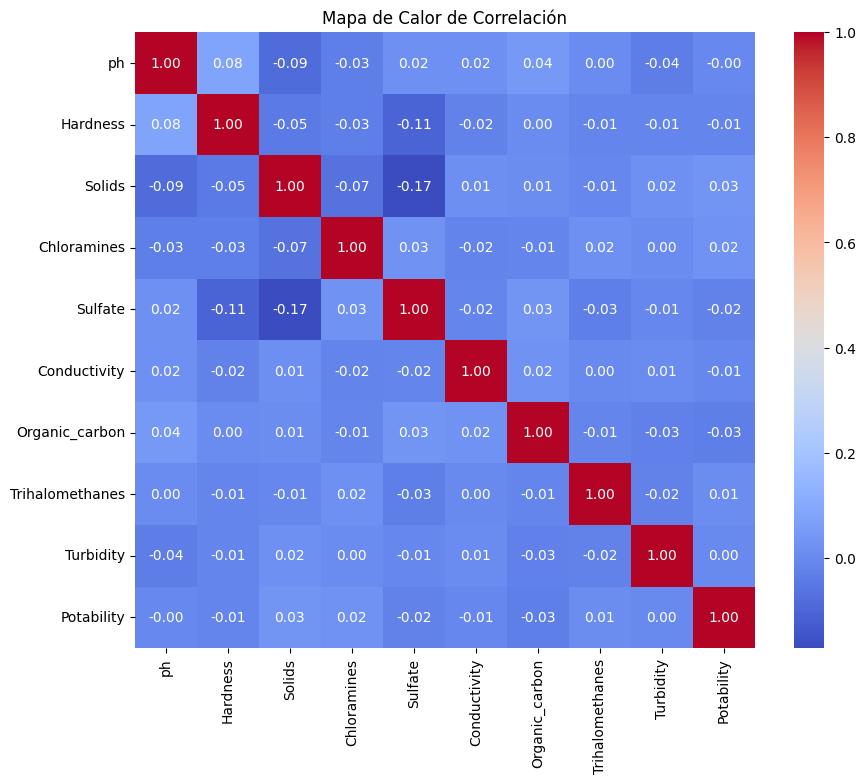

In [11]:
# Mapa de calor de correlación 
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

Correlaciones bajas indica ausencia de correlación lineal.
- **Descartamos** modelos de regresión logística o Linear discriminant analysis (LDA).

Entonces se decide usar modelos No linelaes y basado en reglas o distancias.

Posibles modelos:
- Árboles de decisión / Random Forest.
- XGBoost / LightGBM.
- k-Nearest Neighbors (KNN).
- Redes neuronales.